In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
import pandas as pd
from itertools import combinations_with_replacement
sns.set()
df = pd.read_csv('TempLinkoping2016.csv')
df.head()

,time,temp
0,0.002732,0.1
1,0.005464,-4.5
2,0.008197,-6.3
3,0.010929,-9.6
4,0.013661,-9.9


In [2]:
X = df.iloc[:, 0:1].values
Y = df.iloc[:, 1:2].values

In [3]:
n_features = X.shape[1]
degree = 15
combs = [combinations_with_replacement(range(n_features), i) for i in range(0, degree + 1)]
flat_combs = [item for sublist in combs for item in sublist]
X_new = np.empty((X.shape[0], len(flat_combs)))
for i, index_combs in enumerate(flat_combs):
    X_new[:, i] = np.prod(X[:, index_combs], axis=1)

In [4]:
class Ridge:
    def __init__(self, learning_rate, alpha):
        self.X = tf.placeholder(tf.float32, (None, X_new.shape[1]))
        self.Y = tf.placeholder(tf.float32, (None, 1))
        w = tf.Variable(tf.random_normal([X_new.shape[1], 1]))
        b = tf.Variable(tf.random_normal([1]))
        self.logits = tf.matmul(self.X, w) + b
        l2_w = tf.nn.l2_loss(w)
        l2_b = tf.nn.l2_loss(b)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits)) + alpha * (l2_w + l2_b)
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)

In [5]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = Ridge(3, 0.0005)
sess.run(tf.global_variables_initializer())
for i in range(1000):
    cost, _ = sess.run([model.cost, model.optimizer], feed_dict={model.X:X_new, model.Y:Y})
    if (i+1) % 100 == 0:
        print('epoch %d, MSE: %f'%(i+1, cost))

epoch 100, MSE: 14.193875
epoch 200, MSE: 13.461584
epoch 300, MSE: 13.259464
epoch 400, MSE: 13.194202
epoch 500, MSE: 13.178628
epoch 600, MSE: 13.175649
epoch 700, MSE: 13.175077
epoch 800, MSE: 13.174910
epoch 900, MSE: 13.174827
epoch 1000, MSE: 13.174778


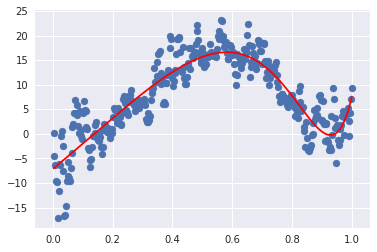

In [6]:
y_output = sess.run(model.logits, feed_dict={model.X:X_new})
plt.scatter(X[:,0],Y[:,0])
plt.plot(X,y_output, c='red')
plt.show()

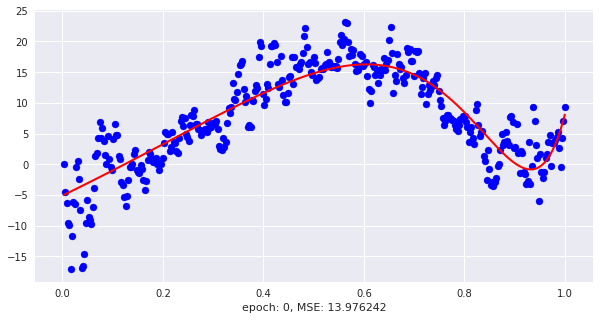

In [8]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = Ridge(3, 0.0005)
sess.run(tf.global_variables_initializer())

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.scatter(X[:,0],Y[:,0], c='b')
cost, y_output = sess.run([model.cost, model.logits], feed_dict={model.X:X_new, model.Y:Y})
ax.set_xlabel('epoch: %d, MSE: %f'%(0,cost))
line, = ax.plot(X,y_output, lw=2, c='r')

def gradient_mean_square(epoch):
    cost, y_output, _ = sess.run([model.cost, model.logits, model.optimizer], feed_dict={model.X:X_new, model.Y:Y})
    line.set_data(X,y_output)
    ax.set_xlabel('epoch: %d, MSE: %f'%(epoch,cost))
    return line, ax

anim = animation.FuncAnimation(fig, gradient_mean_square, frames=100, interval=200)
anim.save('animation-ridge-regression.gif', writer='imagemagick', fps=10)